In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import xarray as xr
import dask
import gev_utils as gevu
import sa_utils as sau
import plotting_utils as pu

from utils import city_list
from utils import roar_code_path as project_code_path
from utils import roar_data_path as project_data_path
from utils import gev_metric_ids, gard_gcms

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Set fonts
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

### Preliminaries

In [1]:
# def plot_uc_metric(metric_id, proj_slice, return_period, norm):
#     # For titles
#     title_labels = {
#         'max_tasmax':f'{return_period} year return level: annual maximum temperature',
#         'max_cdd':f'{return_period} year return level: annual 1-day maximum CDD',
#         'max_hdd':f'{return_period} year return level: annual 1-day maximum HDD',
#         'max_pr':f'{return_period} year return level: annual 1-day maximum precipitation',
#         'min_tasmin':f'{return_period} year return level: annual minimum temperature',
#     }

#     # Make plot
#     fig = plt.figure(figsize=(10, 6), layout='constrained')
#     subfigs = fig.subfigures(2, 1)
#     fig.suptitle(title_labels[metric_id], fontweight='bold')

#     # Absolute value projection
#     axsTop = subfigs[0].subplots(1, 4, subplot_kw=dict(projection=ccrs.LambertConformal()))
#     subfigs[0].suptitle('Projection')
#     p = pu.plot_uc_map(
#         metric_id = metric_id, 
#         proj_slice = proj_slice,
#         hist_slice = None,
#         return_period = return_period,
#         fig = subfigs[0],
#         axs = axsTop,
#         title = None,
#         norm = norm,
#     )

#     # Change from historical
#     axsBottom = subfigs[1].subplots(1, 4, subplot_kw=dict(projection=ccrs.LambertConformal()))
#     p = pu.plot_uc_map(
#         metric_id = metric_id, 
#         proj_slice = proj_slice,
#         hist_slice = '1950-2014',
#         return_period = return_period,
#         fig = subfigs[1],
#         axs = axsBottom,
#         title = None,
#         norm = norm,
#     )
#     subfigs[1].suptitle('Change from historical')

#     plt.show()

## Analysis

In [3]:
ds_loca, ds_star, ds_gard = sau.read_all(
    'max_tasmax',
    'LOCA2',
    'nearest',
    '2050-2100',
    '1950-2014',
    True,
    'lmom',
    ['100yr_return_level'])

In [8]:
%%time
# Calculate all and store
grid = "LOCA2"
regrid_method = "nearest"
col_name = "100yr_return_level"
proj_slice = "2050-2100"
hist_slice = None
stationary = True
fit_method = "lmom"

# uc = sau.uc_all(metric_id="max_tasmax",
#                 grid=grid,
#                 fit_method=fit_method,
#                 stationary=stationary,
#                 regrid_method=regrid_method,
#                 proj_slice = proj_slice,
#                 hist_slice = hist_slice,
#                 col_name=col_name
#                )

save_path = f"{project_data_path}/results/max_tasmax_{proj_slice}_{hist_slice}_100rl_{regrid_method}.nc"
uc.to_netcdf(save_path)

# # Loop through metrics
# for metric_id in gev_metric_ids:
#     # Do for projection, change
#     for hist_slice in [None, "1950-2014"]:
#         # Check if done
#         save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.nc"
#         if not os.path.exists(save_path):
#             # Calculate
#             uc = sau.uc_all(metric_id=metric_id,
#                             regrid_method=regrid_method,
#                             proj_slice = proj_slice,
#                             hist_slice = hist_slice,
#                             return_period = return_period,
#                             return_metric = False)
#             # Store
#             uc.to_netcdf(save_path)
#             print(f"Done: {save_path.split('/')[-1]}")
#             del uc # memory management
#         else:
#             print(f"Already done: {save_path.split('/')[-1]}")

CPU times: user 267 ms, sys: 71 ms, total: 338 ms
Wall time: 1.5 s


## Plots

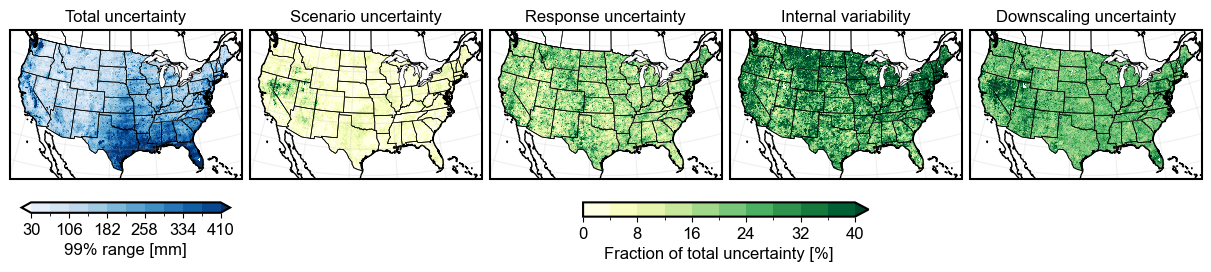

In [5]:
metric_id = 'max_pr'
return_period = 100
proj_slice = '2050-2100'

p = pu.plot_uc_map(
            metric_id = metric_id, 
            proj_slice = proj_slice,
            hist_slice = None,
            return_period = return_period,
            title = None,
            norm = 'uc_99w',
    )
plt.savefig('../figs/map_max_pr_2050-2100_99w.png', dpi=400)

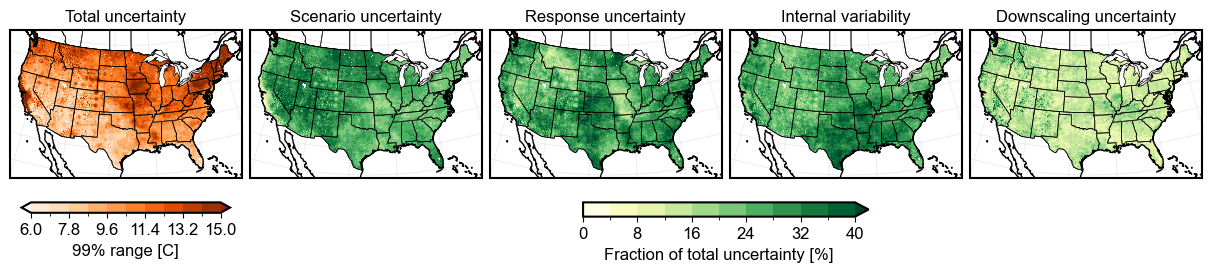

In [10]:
# NEW
metric_id = 'max_tasmax'
return_period = 100
proj_slice = '2050-2100'

p = pu.plot_uc_map(
            metric_id = metric_id, 
            proj_slice = proj_slice,
            hist_slice = None,
            return_period = return_period,
            title = None,
            norm = 'uc_99w',
    )
plt.show()

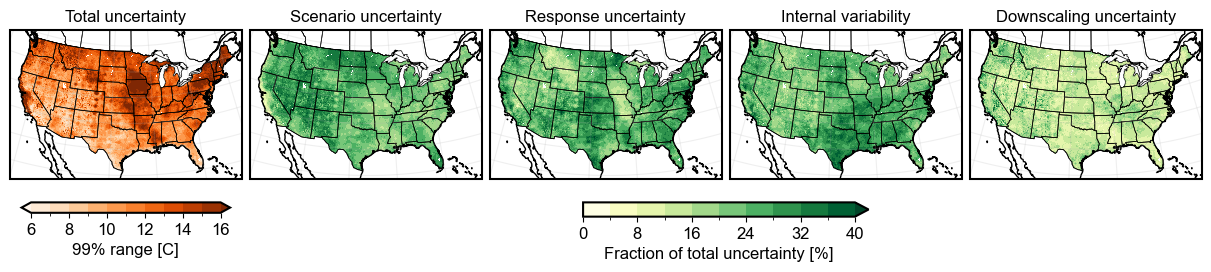

In [6]:
metric_id = 'max_tasmax'
return_period = 100
proj_slice = '2050-2100'

p = pu.plot_uc_map(
            metric_id = metric_id, 
            proj_slice = proj_slice,
            hist_slice = None,
            return_period = return_period,
            title = None,
            norm = 'uc_99w',
    )
plt.savefig('../figs/map_max_tasmax_2050-2100_99w.png', dpi=400)

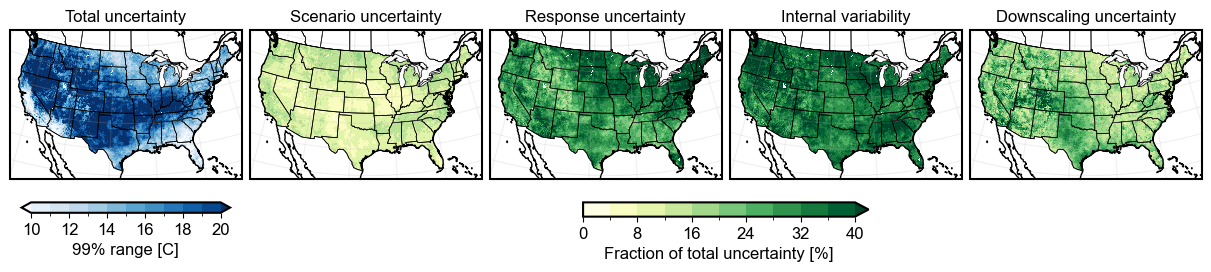

In [4]:
metric_id = 'min_tasmin'
return_period = 100
proj_slice = '2050-2100'

p = pu.plot_uc_map(
            metric_id = metric_id, 
            proj_slice = proj_slice,
            hist_slice = None,
            return_period = return_period,
            title = None,
            norm = 'uc_99w',
    )
plt.savefig('../figs/map_min_tasmin_2050-2100_99w.png', dpi=400)

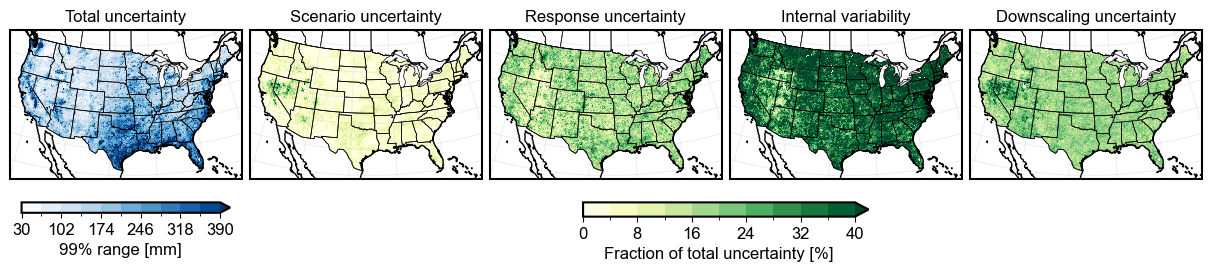

In [4]:
metric_id = 'max_pr'
return_period = 100
proj_slice = '2050-2100'
hist_slice = '1950-2014'

p = pu.plot_uc_map(
            metric_id = metric_id, 
            proj_slice = proj_slice,
            hist_slice = hist_slice,
            return_period = return_period,
            title = None,
            norm = 'uc_99w',
    )

plt.savefig('../figs/map_max_pr_1950-2014_2050-2100_99w.png', dpi=400)

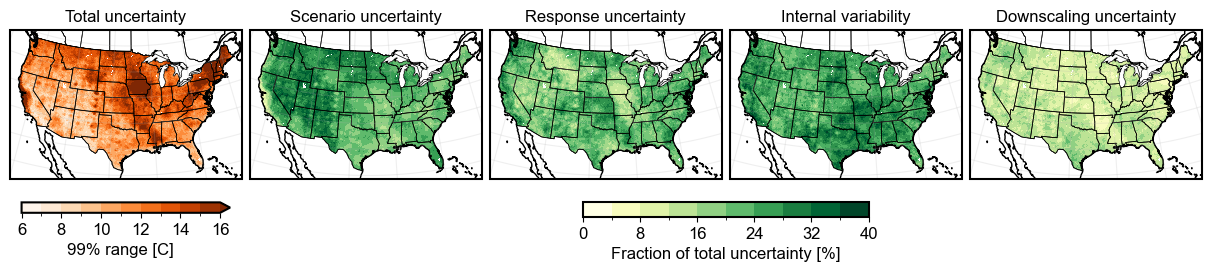

In [5]:
metric_id = 'max_tasmax'
return_period = 100
proj_slice = '2050-2100'
hist_slice = '1950-2014'

p = pu.plot_uc_map(
            metric_id = metric_id, 
            proj_slice = proj_slice,
            hist_slice = hist_slice,
            return_period = return_period,
            title = None,
            norm = 'uc_99w',
    )

plt.savefig('../figs/map_max_tasmax_1950-2014_2050-2100_99w.png', dpi=400)

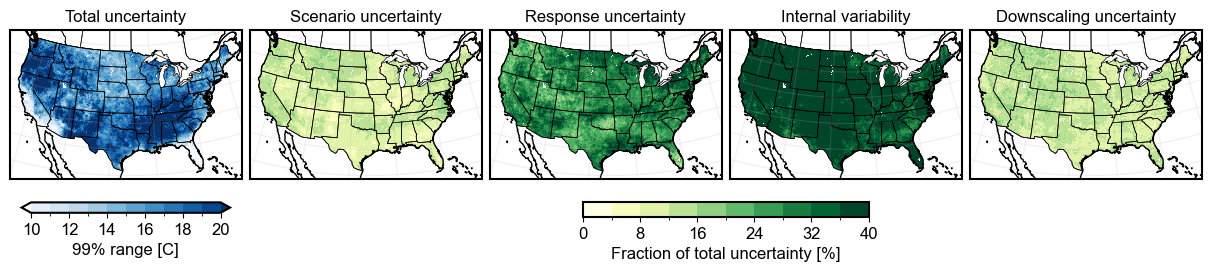

In [6]:
metric_id = 'min_tasmin'
return_period = 100
proj_slice = '2050-2100'
hist_slice = '1950-2014'

p = pu.plot_uc_map(
            metric_id = metric_id, 
            proj_slice = proj_slice,
            hist_slice = hist_slice,
            return_period = return_period,
            title = None,
            norm = 'uc_99w',
    )

plt.savefig('../figs/map_min_tasmin_1950-2014_2050-2100_99w.png', dpi=400)

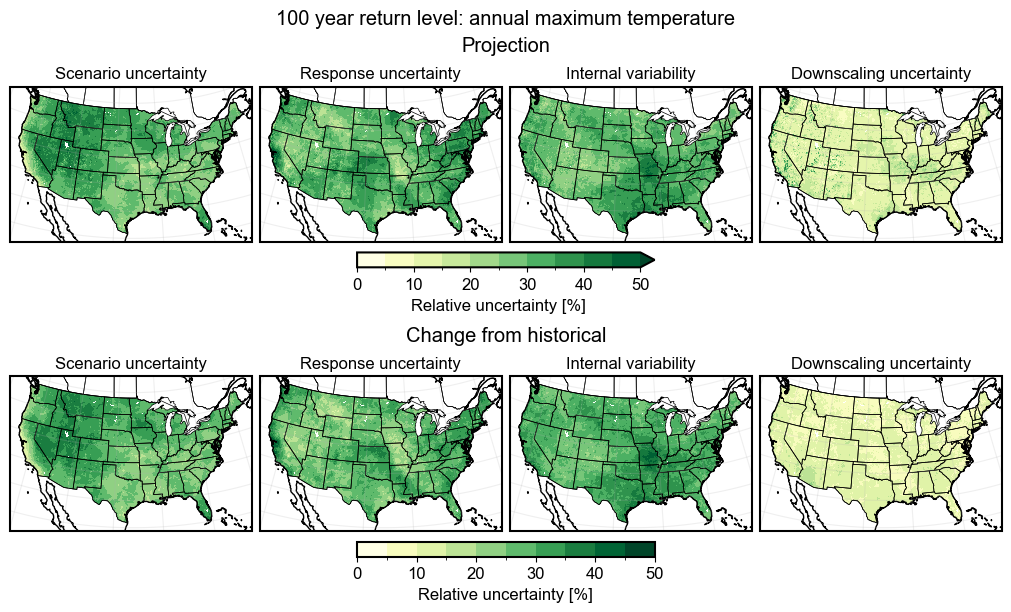

In [10]:
# max tasmax
metric_id = 'max_tasmax'
proj_slice = '2050-2100'
return_period = 100
norm = True
plot_uc_metric(metric_id, proj_slice, return_period, norm)

In [11]:
# # max tasmax
# metric_id = 'max_tasmax'
# proj_slice = '2050-2100'
# return_period = 100
# norm = False
# plot_uc_metric(metric_id, proj_slice, return_period, norm)

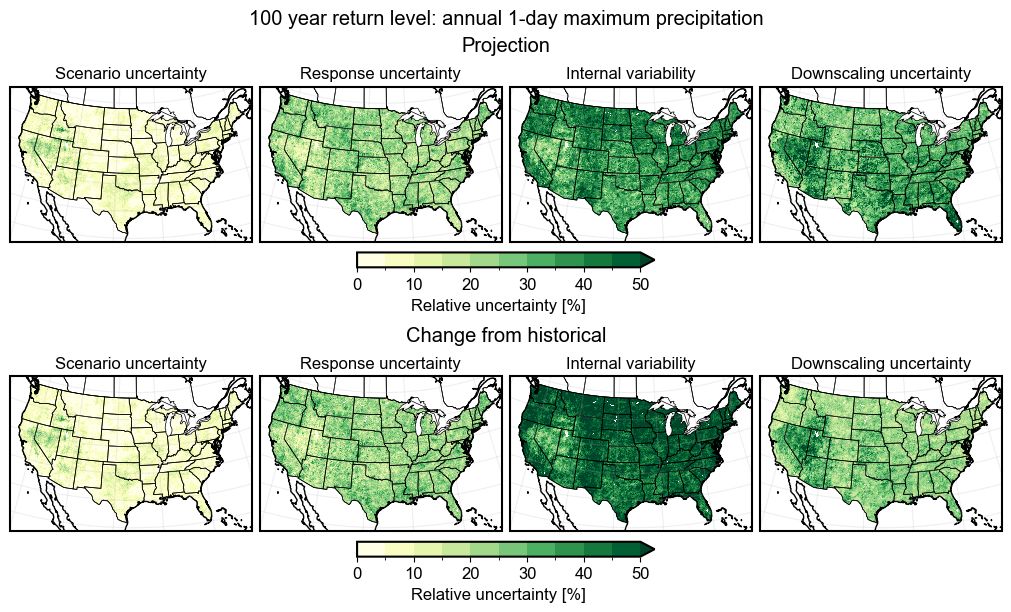

In [12]:
# max pr
metric_id = 'max_pr'
proj_slice = '2050-2100'
return_period = 100
norm = True
plot_uc_metric(metric_id, proj_slice, return_period, norm)

In [13]:
# # max pr
# metric_id = 'max_pr'
# proj_slice = '2050-2100'
# return_period = 100
# norm = False
# plot_uc_metric(metric_id, proj_slice, return_period, norm)

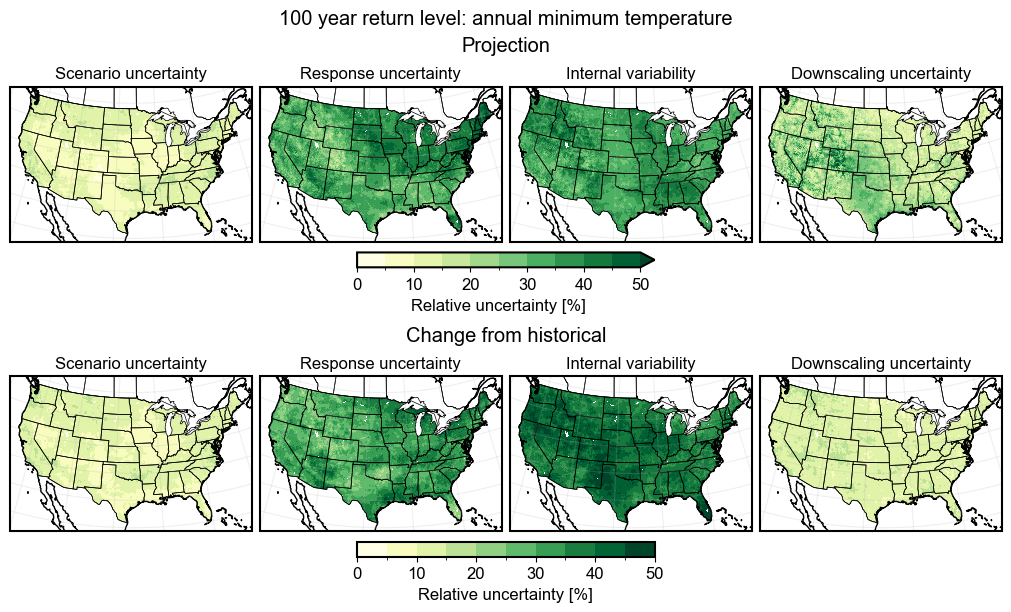

In [14]:
# min tasmin
metric_id = 'min_tasmin'
proj_slice = '2050-2100'
return_period = 100
norm = True
plot_uc_metric(metric_id, proj_slice, return_period, norm)

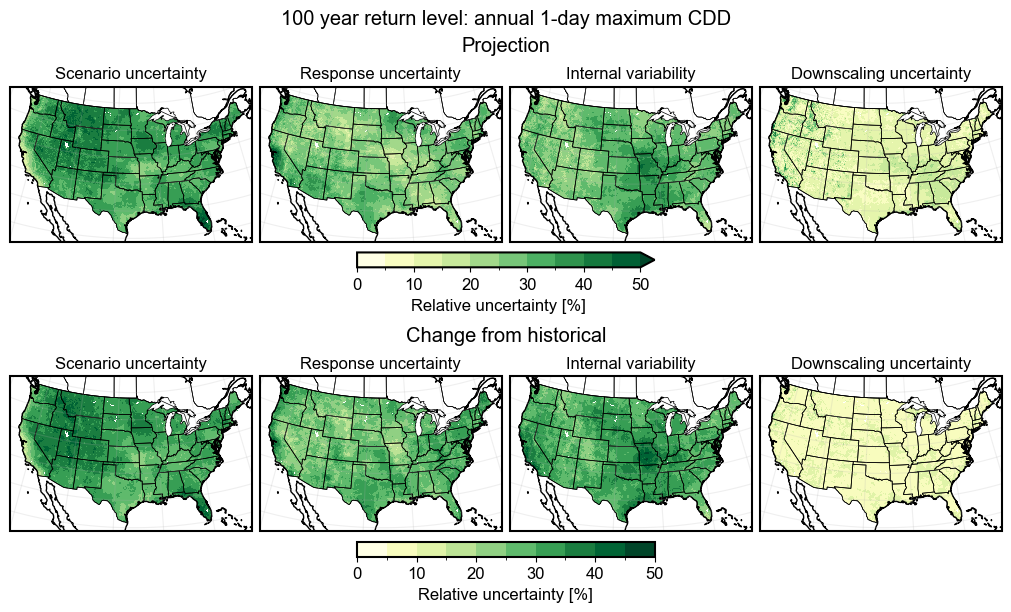

In [15]:
# max cdd
metric_id = 'max_cdd'
proj_slice = '2050-2100'
return_period = 100
norm = True
plot_uc_metric(metric_id, proj_slice, return_period, norm)

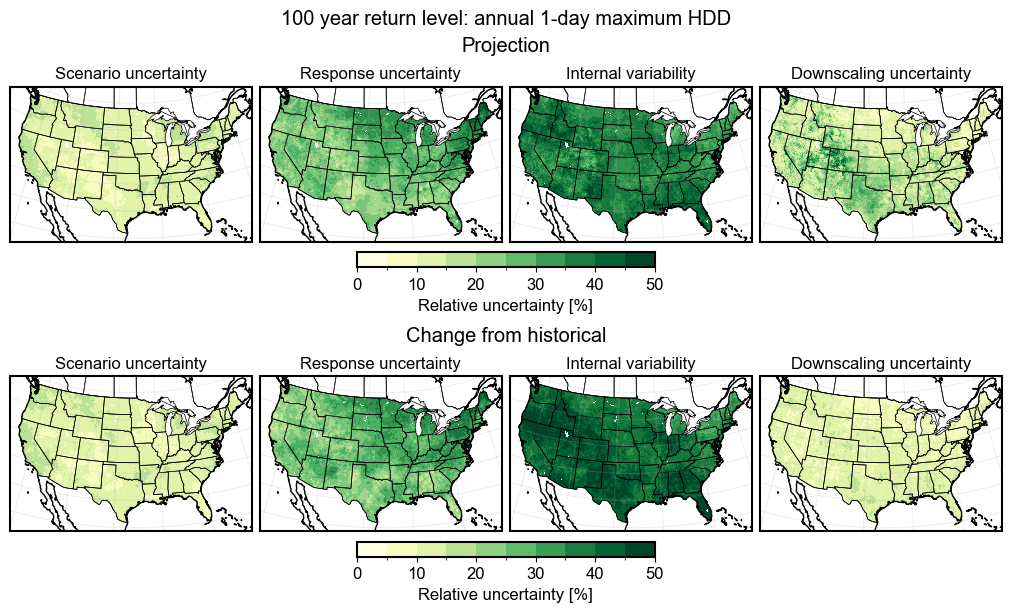

In [16]:
# max hdd
metric_id = 'max_hdd'
proj_slice = '2050-2100'
return_period = 100
norm = True
plot_uc_metric(metric_id, proj_slice, return_period, norm)